In [50]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Alice\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [51]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Alice\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [52]:
import pandas as pd

file_path = './csv_recebidos/Distâncias_aeroportos.csv' #Caminho para o arquivo com as distâncias 
file_path1 = './csv_recebidos/Nome_Aeroporto.csv'  #Caminho para o arquivo com os nomes dos aeroportos

#Recebe o conteúdo do .csv e converte em um dataframe
df = pd.read_csv(file_path) 
df_nome = pd.read_csv(file_path1)
df

,InputID,TargetID,Distância km
0,1,2,2095
1,1,3,1448
2,1,4,2294
3,1,5,2318
4,1,6,2337
...,...,...,...
4417,67,62,1715
4418,67,63,2951
4419,67,64,2632
4420,67,65,103


In [53]:
mapa_ids = {i+1: nome for i, nome in enumerate(df_nome['Aeroportos de origem '])}  #Associa o nome de cada aeroporto ao df dele

#Substitui o id das colunas InputID e TargetID pelo nome do aeroporto
df['InputID'] = df['InputID'].replace(mapa_ids)
df['TargetID'] = df['TargetID'].replace(mapa_ids)
#Incluir equação de cálculo de CO2 futuramente
df['Emissão de CO2'] = df['Distância km'] * 0.123   #Cria a coluna Emissão de CO2
df

,InputID,TargetID,Distância km,Emissão de CO2
0,Aeroporto Internacional de Guarulhos,Aeroporto Internacional Guararapes - Gilberto ...,2095,257.685
1,Aeroporto Internacional de Guarulhos,Aeroporto Internacional Deputado Luís Eduardo ...,1448,178.104
2,Aeroporto Internacional de Guarulhos,Aeroporto Internacional Governador Aluízio Alves,2294,282.162
3,Aeroporto Internacional de Guarulhos,Aeroporto Internacional Marechal Cunha Machado,2318,285.114
4,Aeroporto Internacional de Guarulhos,Aeroporto Internacional Pinto Martins,2337,287.451
...,...,...,...,...
4417,Aeroporto de Vágar,Aeroporto de Bratislava,1715,210.945
4418,Aeroporto de Vágar,Aeroporto de Ljubljana Jože Pučnik,2951,362.973
4419,Aeroporto de Vágar,Aeroporto Adolfo Suárez Madrid-Barajas,2632,323.736
4420,Aeroporto de Vágar,Aeroporto de Barcelona-El Prat,103,12.669


In [54]:
#Formata as horas para esta no formato Horas:Minutos
def format_time(hours):
    h = int(hours)
    m = int((hours - h) * 60)
    return f"{h:02}:{m:02}"

# Cálculo do tempo médio para Comercial
df['Tempo Médio Horas - Comercial'] = df['Distância km'].apply(
    lambda d: f"{format_time(d / 900)} ~ {format_time(d / 850)}"
)

# Cálculo do tempo médio para Cargueiro
df['Tempo Médio Horas - Cargueiro'] = df['Distância km'].apply(
    lambda d: f"{format_time(d / 850)} ~ {format_time(d / 800)}"
)

df


,InputID,TargetID,Distância km,Emissão de CO2,Tempo Médio Horas - Comercial,Tempo Médio Horas - Cargueiro
0,Aeroporto Internacional de Guarulhos,Aeroporto Internacional Guararapes - Gilberto ...,2095,257.685,02:19 ~ 02:27,02:27 ~ 02:37
1,Aeroporto Internacional de Guarulhos,Aeroporto Internacional Deputado Luís Eduardo ...,1448,178.104,01:36 ~ 01:42,01:42 ~ 01:48
2,Aeroporto Internacional de Guarulhos,Aeroporto Internacional Governador Aluízio Alves,2294,282.162,02:32 ~ 02:41,02:41 ~ 02:52
3,Aeroporto Internacional de Guarulhos,Aeroporto Internacional Marechal Cunha Machado,2318,285.114,02:34 ~ 02:43,02:43 ~ 02:53
4,Aeroporto Internacional de Guarulhos,Aeroporto Internacional Pinto Martins,2337,287.451,02:35 ~ 02:44,02:44 ~ 02:55
...,...,...,...,...,...,...
4417,Aeroporto de Vágar,Aeroporto de Bratislava,1715,210.945,01:54 ~ 02:01,02:01 ~ 02:08
4418,Aeroporto de Vágar,Aeroporto de Ljubljana Jože Pučnik,2951,362.973,03:16 ~ 03:28,03:28 ~ 03:41
4419,Aeroporto de Vágar,Aeroporto Adolfo Suárez Madrid-Barajas,2632,323.736,02:55 ~ 03:05,03:05 ~ 03:17
4420,Aeroporto de Vágar,Aeroporto de Barcelona-El Prat,103,12.669,00:06 ~ 00:07,00:07 ~ 00:07


In [55]:
aeroportos_interesse = [
    "Aeroporto Internacional de Guarulhos",
    "Aeroporto Internacional Guararapes - Gilberto Freyre",
    "Aeroporto Internacional Deputado Luís Eduardo Magalhães",
    "Aeroporto Internacional Governador Aluízio Alves",
    "Aeroporto Internacional Marechal Cunha Machado",
    "Aeroporto Internacional Pinto Martins"
]

#Gera um numpy array com todos os nomes únicos de aeroportos
unique = df['InputID'].unique()

# Converter para uma lista 
lista_origem = unique.tolist()

#Remove os aeroportos nacionais
for i in aeroportos_interesse:
    lista_origem.remove(i)

lista_origem

['Aeroporto Internacional de Nursultan Nazarbayev',
 'Aeroporto Internacional de Xangai Pudong',
 'Aeroporto Internacional de Pequim Capital',
 'Aeroporto Internacional de Pyongyang Sunan',
 'Aeroporto Internacional de Incheon',
 'Aeroporto Internacional Ninoy Aquino',
 'Aeroporto Internacional de Hong Kong',
 'Aeroporto Internacional Indira Gandhi',
 'Aeroporto Internacional Soekarno-Hatta (Jacarta)',
 'Aeroporto Internacional Ngurah Rai (Bali)',
 'Aeroporto Internacional de Narita (Tóquio)',
 'Aeroporto Internacional de Haneda (Tóquio)',
 'Aeroporto Internacional de Kansai (Osaka)',
 'Aeroporto Internacional de Wattay (Vientiane)',
 'Aeroporto Internacional de Kuala Lumpur (Sepang)',
 'Aeroporto Internacional de Penang (Penang)',
 'Aeroporto Internacional de Malé',
 'Aeroporto Internacional de Changi',
 'Aeroporto Internacional de Suvarnabhumi',
 'Aeroporto Internacional Don Mueang',
 'Aeroporto Internacional de Taiwan Taoyuan',
 'Aeroporto Internacional de Tan Son Nhat',
 'Aeroporto

In [56]:
result = []

#Passa por todos os aeroportos internacionais
for i in lista_origem:

    # Inicializando dados para cada aeroporto nacional
    sp = [None, None, None, None]
    pe = [None, None, None, None]
    ba = [None, None, None, None]
    rn = [None, None, None, None]
    ma = [None, None, None, None]
    ce = [None, None, None, None]
    
    #Passa por todos os aeroportos nacionais
    for j in aeroportos_interesse:

        #Seleciona a linha com as informações sobre o aeroporto internacional i e o aerporto nacional j
        linha = df.loc[(df['InputID'] == i) & (df['TargetID'] == j)]
        
        if not linha.empty:  # Certificar que a linha existe no dataset
            #Armazena as informações referentes a essa linha nas variáveis
            distancia = linha['Distância km'].values[0]
            emissao = linha['Emissão de CO2'].values[0]
            tempo_comercial = linha['Tempo Médio Horas - Comercial'].values[0]
            tempo_carga = linha['Tempo Médio Horas - Cargueiro'].values[0]
            
            #Verifica qual o aeroporto que está sendo analisado e armazena as informações na variável correta
            if j == "Aeroporto Internacional de Guarulhos":
                sp = [distancia, emissao, tempo_comercial, tempo_carga]
            elif j == "Aeroporto Internacional Guararapes - Gilberto Freyre":
                pe = [distancia, emissao, tempo_comercial, tempo_carga]
            elif j == "Aeroporto Internacional Deputado Luís Eduardo Magalhães":
                ba = [distancia, emissao, tempo_comercial, tempo_carga]
            elif j == "Aeroporto Internacional Governador Aluízio Alves":
                rn = [distancia, emissao, tempo_comercial, tempo_carga]
            elif j == "Aeroporto Internacional Marechal Cunha Machado":
                ma = [distancia, emissao, tempo_comercial, tempo_carga]
            else:
                ce = [distancia, emissao, tempo_comercial, tempo_carga]
    
    # Adiciona os dados para a origem atual no resultado
    result.append({
        "Origem": i,
        "São Paulo - Guarulhos (Km)": sp[0],
        "São Paulo - Guarulhos (Kg)": sp[1],
        "São Paulo - Guarulhos (Hr - Comercial)": sp[2],
        "São Paulo - Guarulhos (Hr - Cargueiro)": sp[3],
        "Recife - Guararapes (Km)": pe[0],
        "Recife - Guararapes (Kg)": pe[1],
        "Recife - Guararapes (Hr - Comercial)": pe[2],
        "Recife - Guararapes (Hr - Cargueiro)": pe[3],
        "Salvador - Dpt. Magalhães (Km)": ba[0],
        "Salvador - Dpt. Magalhães (Kg)": ba[1],
        "Salvador - Dpt. Magalhães (Hr - Comercial)": ba[2],
        "Salvador - Dpt. Magalhães (Hr - Cargueiro)": ba[3],
        "Natal - Gov. Alves (Km)": rn[0],
        "Natal - Gov. Alves (Kg)": rn[1],
        "Natal - Gov. Alves (Hr - Comercial)": rn[2],
        "Natal - Gov. Alves (Hr - Cargueiro)": rn[3],
        "São Luiz - Mar. Cunha (Km)": ma[0],
        "São Luiz - Mar. Cunha (Kg)": ma[1],
        "São Luiz - Mar. Cunha (Hr - Comercial)": ma[2],
        "São Luiz - Mar. Cunha (Hr - Cargueiro)": ma[3],
        "Fortaleza - Martins (Km)": ce[0],
        "Fortaleza - Martins (Kg)": ce[1],
        "Fortaleza - Martins (Hr - Comercial)": ce[2],
        "Fortaleza - Martins (Hr - Cargueiro)": ce[3]
    })

#Transforma o dicionário result em um dataframe
df_result = pd.DataFrame(result)
df_result


,Origem,São Paulo - Guarulhos (Km),São Paulo - Guarulhos (Kg),São Paulo - Guarulhos (Hr - Comercial),São Paulo - Guarulhos (Hr - Cargueiro),Recife - Guararapes (Km),Recife - Guararapes (Kg),Recife - Guararapes (Hr - Comercial),Recife - Guararapes (Hr - Cargueiro),Salvador - Dpt. Magalhães (Km),...,Natal - Gov. Alves (Hr - Comercial),Natal - Gov. Alves (Hr - Cargueiro),São Luiz - Mar. Cunha (Km),São Luiz - Mar. Cunha (Kg),São Luiz - Mar. Cunha (Hr - Comercial),São Luiz - Mar. Cunha (Hr - Cargueiro),Fortaleza - Martins (Km),Fortaleza - Martins (Kg),Fortaleza - Martins (Hr - Comercial),Fortaleza - Martins (Hr - Cargueiro)
0,Aeroporto Internacional de Nursultan Nazarbayev,13941,1714.743,15:29 ~ 16:24,16:24 ~ 17:25,11852,1457.796,13:10 ~ 13:56,13:56 ~ 14:48,12498,...,12:58 ~ 13:43,13:43 ~ 14:35,12004,1476.492,13:20 ~ 14:07,14:07 ~ 15:00,11724,1442.052,13:01 ~ 13:47,13:47 ~ 14:39
1,Aeroporto Internacional de Xangai Pudong,18581,2285.463,20:38 ~ 21:51,21:51 ~ 23:13,16506,2030.238,18:20 ~ 19:25,19:25 ~ 20:37,17150,...,18:08 ~ 19:12,19:12 ~ 20:24,16524,2032.452,18:21 ~ 19:26,19:26 ~ 20:39,16349,2010.927,18:09 ~ 19:14,19:14 ~ 20:26
2,Aeroporto Internacional de Pequim Capital,17578,2162.094,19:31 ~ 20:40,20:40 ~ 21:58,15483,1904.409,17:12 ~ 18:12,18:12 ~ 19:21,16130,...,16:59 ~ 17:58,17:58 ~ 19:06,15429,1897.767,17:08 ~ 18:09,18:09 ~ 19:17,15276,1878.948,16:58 ~ 17:58,17:58 ~ 19:05
3,Aeroporto Internacional de Pyongyang Sunan,18106,2227.038,20:07 ~ 21:18,21:18 ~ 22:37,16057,1975.011,17:50 ~ 18:53,18:53 ~ 20:04,16696,...,17:35 ~ 18:37,18:37 ~ 19:47,15821,1945.983,17:34 ~ 18:36,18:36 ~ 19:46,15769,1939.587,17:31 ~ 18:33,18:33 ~ 19:42
4,Aeroporto Internacional de Incheon,18312,2252.376,20:20 ~ 21:32,21:32 ~ 22:53,16257,1999.611,18:03 ~ 19:07,19:07 ~ 20:19,16898,...,17:49 ~ 18:52,18:52 ~ 20:03,16028,1971.444,17:48 ~ 18:51,18:51 ~ 20:02,15975,1964.925,17:45 ~ 18:47,18:47 ~ 19:58
5,Aeroporto Internacional Ninoy Aquino,18378,2260.494,20:25 ~ 21:37,21:37 ~ 22:58,17316,2129.868,19:14 ~ 20:22,20:22 ~ 21:38,17795,...,19:10 ~ 20:18,20:18 ~ 21:34,17934,2205.882,19:55 ~ 21:05,21:05 ~ 22:25,17490,2151.270,19:26 ~ 20:34,20:34 ~ 21:51
6,Aeroporto Internacional de Hong Kong,18018,2216.214,20:01 ~ 21:11,21:11 ~ 22:31,16343,2010.189,18:09 ~ 19:13,19:13 ~ 20:25,16913,...,18:02 ~ 19:06,19:06 ~ 20:18,16805,2067.015,18:40 ~ 19:46,19:46 ~ 21:00,16414,2018.922,18:14 ~ 19:18,19:18 ~ 20:31
7,Aeroporto Internacional Indira Gandhi,14403,1771.569,16:00 ~ 16:56,16:56 ~ 18:00,12594,1549.062,13:59 ~ 14:48,14:48 ~ 15:44,13165,...,13:53 ~ 14:42,14:42 ~ 15:37,13193,1622.739,14:39 ~ 15:31,15:31 ~ 16:29,12714,1563.822,14:07 ~ 14:57,14:57 ~ 15:53
8,Aeroporto Internacional Soekarno-Hatta (Jacarta),15633,1922.859,17:22 ~ 18:23,18:23 ~ 19:32,15486,1904.778,17:12 ~ 18:13,18:13 ~ 19:21,15621,...,17:20 ~ 18:21,18:21 ~ 19:30,16657,2048.811,18:30 ~ 19:35,19:35 ~ 20:49,16013,1969.599,17:47 ~ 18:50,18:50 ~ 20:00
9,Aeroporto Internacional Ngurah Rai (Bali),15929,1959.267,17:41 ~ 18:44,18:44 ~ 19:54,16223,1995.429,18:01 ~ 19:05,19:05 ~ 20:16,16239,...,18:11 ~ 19:15,19:15 ~ 20:28,17421,2142.783,19:21 ~ 20:29,20:29 ~ 21:46,16799,2066.277,18:39 ~ 19:45,19:45 ~ 20:59


In [57]:
# Ordenar o DataFrame pelo valor da coluna "São Paulo - Guarulhos (Km)"
df_result_sorted = df_result.sort_values(by="São Paulo - Guarulhos (Km)", ascending=True).reset_index(drop=True)

df_result_sorted.to_csv('./csv_gerado/Tabela_Completa.csv', index=False)

#Adicionar coluna de frete

#Eventualmente o código vai ter outro cálculo de CO2

#Incluir CO2 extra

df_result_sorted

,Origem,São Paulo - Guarulhos (Km),São Paulo - Guarulhos (Kg),São Paulo - Guarulhos (Hr - Comercial),São Paulo - Guarulhos (Hr - Cargueiro),Recife - Guararapes (Km),Recife - Guararapes (Kg),Recife - Guararapes (Hr - Comercial),Recife - Guararapes (Hr - Cargueiro),Salvador - Dpt. Magalhães (Km),...,Natal - Gov. Alves (Hr - Comercial),Natal - Gov. Alves (Hr - Cargueiro),São Luiz - Mar. Cunha (Km),São Luiz - Mar. Cunha (Kg),São Luiz - Mar. Cunha (Hr - Comercial),São Luiz - Mar. Cunha (Hr - Cargueiro),Fortaleza - Martins (Km),Fortaleza - Martins (Kg),Fortaleza - Martins (Hr - Comercial),Fortaleza - Martins (Hr - Cargueiro)
0,Aeroporto Internacional Henri Coandă (Bucareste),7909,972.807,08:47 ~ 09:18,09:18 ~ 09:53,5837,717.951,06:29 ~ 06:52,06:52 ~ 07:17,6477,...,06:14 ~ 06:36,06:36 ~ 07:01,5823,716.229,06:28 ~ 06:51,06:51 ~ 07:16,5596,688.308,06:13 ~ 06:35,06:35 ~ 06:59
1,Aeroporto Humberto Delgado (Lisboa),8154,1002.942,09:03 ~ 09:35,09:35 ~ 10:11,6089,748.947,06:45 ~ 07:09,07:09 ~ 07:36,6726,...,06:31 ~ 06:54,06:54 ~ 07:20,6042,743.166,06:42 ~ 07:06,07:06 ~ 07:33,5834,717.582,06:28 ~ 06:51,06:51 ~ 07:17
2,Aeroporto de Ljubljana Jože Pučnik,8355,1027.665,09:16 ~ 09:49,09:49 ~ 10:26,6271,771.333,06:58 ~ 07:22,07:22 ~ 07:50,6915,...,06:44 ~ 07:07,07:07 ~ 07:34,6310,776.130,07:00 ~ 07:25,07:25 ~ 07:53,6059,745.257,06:43 ~ 07:07,07:07 ~ 07:34
3,Aeroporto Internacional Madre Teresa (Tirana),8742,1075.266,09:42 ~ 10:17,10:17 ~ 10:55,6650,817.950,07:23 ~ 07:49,07:49 ~ 08:18,7296,...,07:09 ~ 07:35,07:35 ~ 08:03,6745,829.635,07:29 ~ 07:56,07:56 ~ 08:25,6468,795.564,07:11 ~ 07:36,07:36 ~ 08:05
4,Aeroporto Adolfo Suárez Madrid-Barajas,8743,1075.389,09:42 ~ 10:17,10:17 ~ 10:55,6650,817.950,07:23 ~ 07:49,07:49 ~ 08:18,7297,...,07:10 ~ 07:35,07:35 ~ 08:03,6745,829.635,07:29 ~ 07:56,07:56 ~ 08:25,6469,795.687,07:11 ~ 07:36,07:36 ~ 08:05
5,Aeroporto de Barcelona-El Prat (Espanha),8889,1093.347,09:52 ~ 10:27,10:27 ~ 11:06,6802,836.646,07:33 ~ 08:00,08:00 ~ 08:30,7447,...,07:19 ~ 07:45,07:45 ~ 08:14,6846,842.058,07:36 ~ 08:03,08:03 ~ 08:33,6596,811.308,07:19 ~ 07:45,07:45 ~ 08:14
6,Aeroporto Francisco Sá Carneiro (Porto),9174,1128.402,10:11 ~ 10:47,10:47 ~ 11:28,7100,873.300,07:53 ~ 08:21,08:21 ~ 08:52,7741,...,07:42 ~ 08:09,08:09 ~ 08:40,7423,913.029,08:14 ~ 08:43,08:43 ~ 09:16,7042,866.166,07:49 ~ 08:17,08:17 ~ 08:48
7,Aeroporto de Oslo-Gardermoen,9414,1157.922,10:27 ~ 11:04,11:04 ~ 11:46,7320,900.360,08:07 ~ 08:36,08:36 ~ 09:09,7967,...,07:55 ~ 08:23,08:23 ~ 08:55,7509,923.607,08:20 ~ 08:50,08:50 ~ 09:23,7191,884.493,07:59 ~ 08:27,08:27 ~ 08:59
8,Aeroporto de Heathrow (Londres),9421,1158.783,10:28 ~ 11:05,11:05 ~ 11:46,7365,905.895,08:11 ~ 08:39,08:39 ~ 09:12,7999,...,07:56 ~ 08:24,08:24 ~ 08:55,7266,893.718,08:04 ~ 08:32,08:32 ~ 09:04,7092,872.316,07:52 ~ 08:20,08:20 ~ 08:51
9,Aeroporto de Praga,9436,1160.628,10:29 ~ 11:06,11:06 ~ 11:47,7382,907.986,08:12 ~ 08:41,08:41 ~ 09:13,8016,...,07:57 ~ 08:25,08:25 ~ 08:56,7276,894.948,08:05 ~ 08:33,08:33 ~ 09:05,7106,874.038,07:53 ~ 08:21,08:21 ~ 08:52


In [ ]:
# DataFrame apenas com as distâncias e as origens
df_distancias = df_result.filter([
    "Origem",
    "São Paulo - Guarulhos (Km)",
    "Recife - Guararapes (Km)",
    "Salvador - Dpt. Magalhães (Km)",
    "Natal - Gov. Alves (Km)",
    "São Luiz - Mar. Cunha (Km)",
    "Fortaleza - Martins (Km)"
])

# DataFrame apenas com as emissões e as origens
df_emissoes = df_result.filter([
    "Origem",
    "São Paulo - Guarulhos (Kg)",
    "Recife - Guararapes (Kg)",
    "Salvador - Dpt. Magalhães (Kg)",
    "Natal - Gov. Alves (Kg)",
    "São Luiz - Mar. Cunha (Kg)",
    "Fortaleza - Martins (Kg)"
])

# DataFrame apenas com os tempos de voo comercial e as origens
df_tempo_comercial = df_result.filter([
    "Origem",
    "São Paulo - Guarulhos (Hr - Comercial)",
    "Recife - Guararapes (Hr - Comercial)",
    "Salvador - Dpt. Magalhães (Hr - Comercial)",
    "Natal - Gov. Alves (Hr - Comercial)",
    "São Luiz - Mar. Cunha (Hr - Comercial)",
    "Fortaleza - Martins (Hr - Comercial)"
])

# DataFrame apenas com os tempos de voo de carga e as origens
df_tempo_carga = df_result.filter([
    "Origem",
    "São Paulo - Guarulhos (Hr - Cargueiro)",
    "Recife - Guararapes (Hr - Cargueiro)",
    "Salvador - Dpt. Magalhães (Hr - Cargueiro)",
    "Natal - Gov. Alves (Hr - Cargueiro)",
    "São Luiz - Mar. Cunha (Hr - Cargueiro)",
    "Fortaleza - Martins (Hr - Cargueiro)"
])

# Exportar os DataFrames para CSV
df_distancias.to_csv('./csv_gerado/Tabela_Distâncias.csv', index=False)
df_emissoes.to_csv('./csv_gerado/Tabela_Emissão.csv', index=False)
df_tempo_comercial.to_csv('./csv_gerado/Tabela_Tempo_Comercial.csv', index=False)
df_tempo_carga.to_csv('./csv_gerado/Tabela_Tempo_Carga.csv', index=False)

df_distancias


,Origem,São Paulo - Guarulhos (Km),Recife - Guararapes (Km),Salvador - Dpt. Magalhães (Km),Natal - Gov. Alves (Km),São Luiz - Mar. Cunha (Km),Fortaleza - Martins (Km)
0,Aeroporto Internacional de Nursultan Nazarbayev,13941,11852,12498,11673,12004,11724
1,Aeroporto Internacional de Xangai Pudong,18581,16506,17150,16326,16524,16349
2,Aeroporto Internacional de Pequim Capital,17578,15483,16130,15285,15429,15276
3,Aeroporto Internacional de Pyongyang Sunan,18106,16057,16696,15838,15821,15769
4,Aeroporto Internacional de Incheon,18312,16257,16898,16040,16028,15975
5,Aeroporto Internacional Ninoy Aquino,18378,17316,17795,17262,17934,17490
6,Aeroporto Internacional de Hong Kong,18018,16343,16913,16242,16805,16414
7,Aeroporto Internacional Indira Gandhi,14403,12594,13165,12504,13193,12714
8,Aeroporto Internacional Soekarno-Hatta (Jacarta),15633,15486,15621,15602,16657,16013
9,Aeroporto Internacional Ngurah Rai (Bali),15929,16223,16239,16376,17421,16799


In [62]:
#Calcular as distâncias entre os aeroportos nacionais e Natal
dist_sp = (df.loc[(df['InputID'] == "Aeroporto Internacional de Guarulhos") & (df['TargetID'] == "Aeroporto Internacional Governador Aluízio Alves")])['Distância km'].values[0]
dist_pe = (df.loc[(df['InputID'] == "Aeroporto Internacional Guararapes - Gilberto Freyre") & (df['TargetID'] == "Aeroporto Internacional Governador Aluízio Alves")])['Distância km'].values[0]
dist_ba = (df.loc[(df['InputID'] == "Aeroporto Internacional Deputado Luís Eduardo Magalhães") & (df['TargetID'] == "Aeroporto Internacional Governador Aluízio Alves")])['Distância km'].values[0]
dist_ma = (df.loc[(df['InputID'] == "Aeroporto Internacional Marechal Cunha Machado") & (df['TargetID'] == "Aeroporto Internacional Governador Aluízio Alves")])['Distância km'].values[0]
dist_ce = (df.loc[(df['InputID'] == "Aeroporto Internacional Pinto Martins") & (df['TargetID'] == "Aeroporto Internacional Governador Aluízio Alves")])['Distância km'].values[0]

Processando aeroportos: ['Aeroporto Internacional de Nursultan Nazarbayev', 'Aeroporto Internacional de Xangai Pudong', 'Aeroporto Internacional de Pequim Capital', 'Aeroporto Internacional de Pyongyang Sunan', 'Aeroporto Internacional de Incheon']


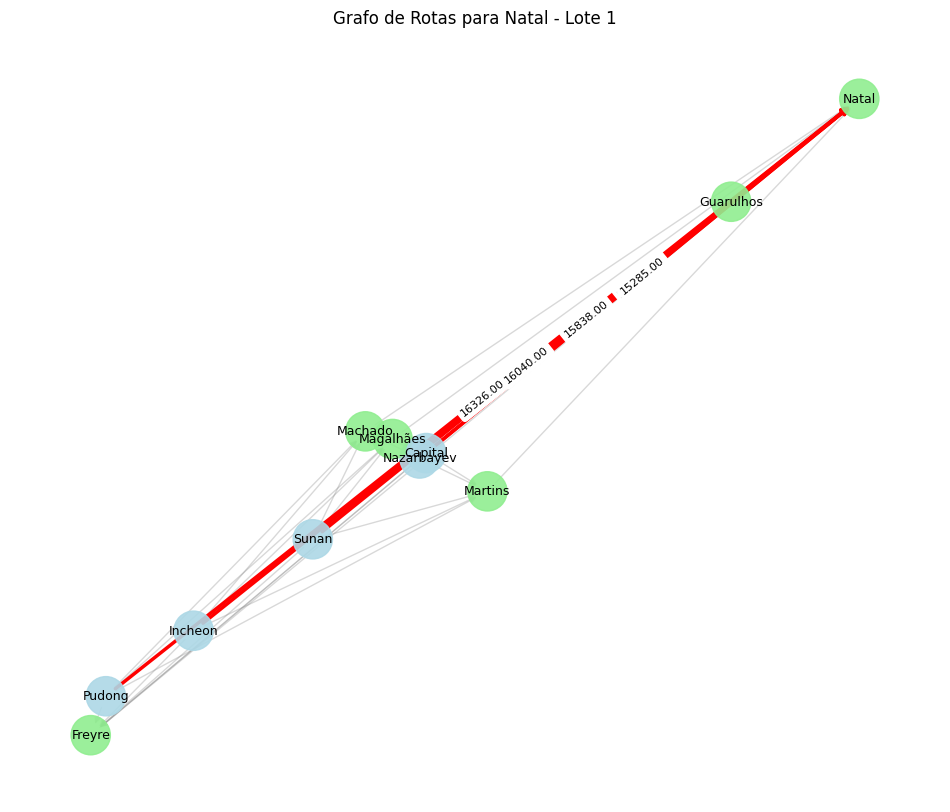

Processando aeroportos: ['Aeroporto Internacional Ninoy Aquino', 'Aeroporto Internacional de Hong Kong', 'Aeroporto Internacional Indira Gandhi', 'Aeroporto Internacional Soekarno-Hatta (Jacarta)', 'Aeroporto Internacional Ngurah Rai (Bali)']


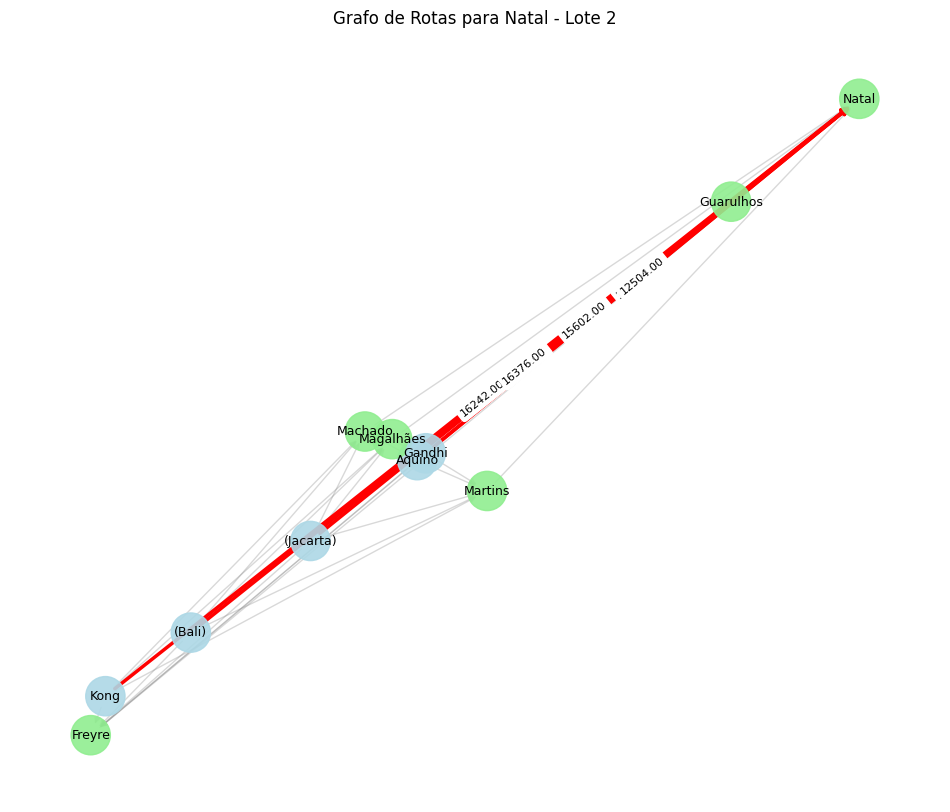

Processando aeroportos: ['Aeroporto Internacional de Narita (Tóquio)', 'Aeroporto Internacional de Haneda (Tóquio)', 'Aeroporto Internacional de Kansai (Osaka)', 'Aeroporto Internacional de Wattay (Vientiane)', 'Aeroporto Internacional de Kuala Lumpur (Sepang)']


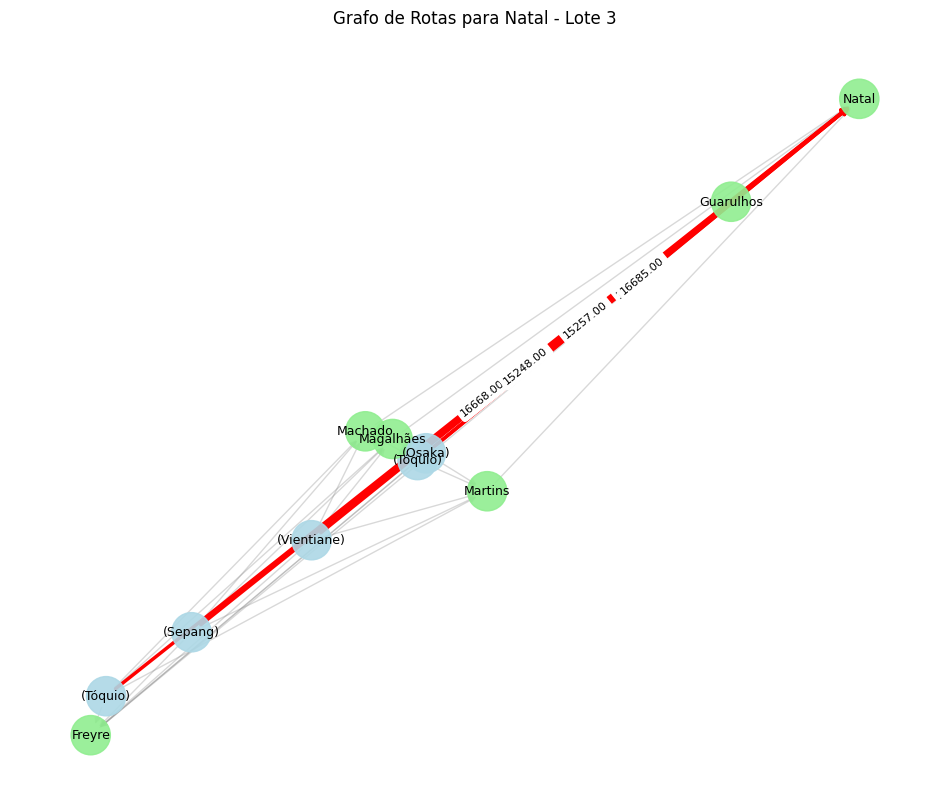

Processando aeroportos: ['Aeroporto Internacional de Penang (Penang)', 'Aeroporto Internacional de Malé', 'Aeroporto Internacional de Changi', 'Aeroporto Internacional de Suvarnabhumi', 'Aeroporto Internacional Don Mueang']


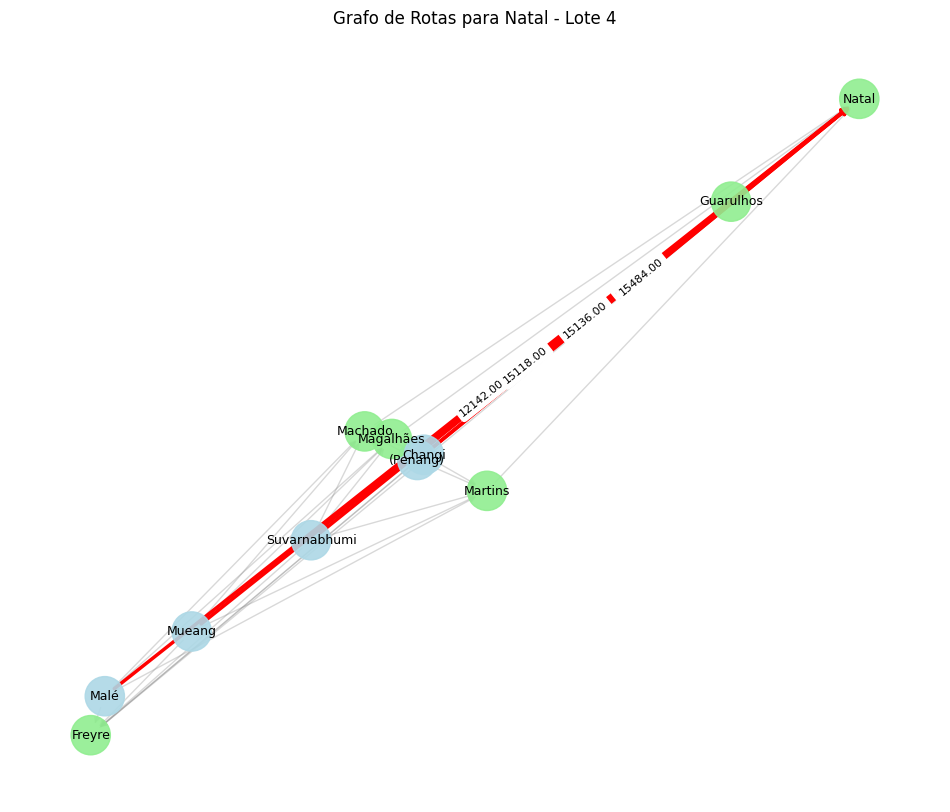

Processando aeroportos: ['Aeroporto Internacional de Taiwan Taoyuan', 'Aeroporto Internacional de Tan Son Nhat', 'Aeroporto Internacional de Noi Bai', 'Aeroporto de Frankfurt', 'Aeroporto de Dublin']


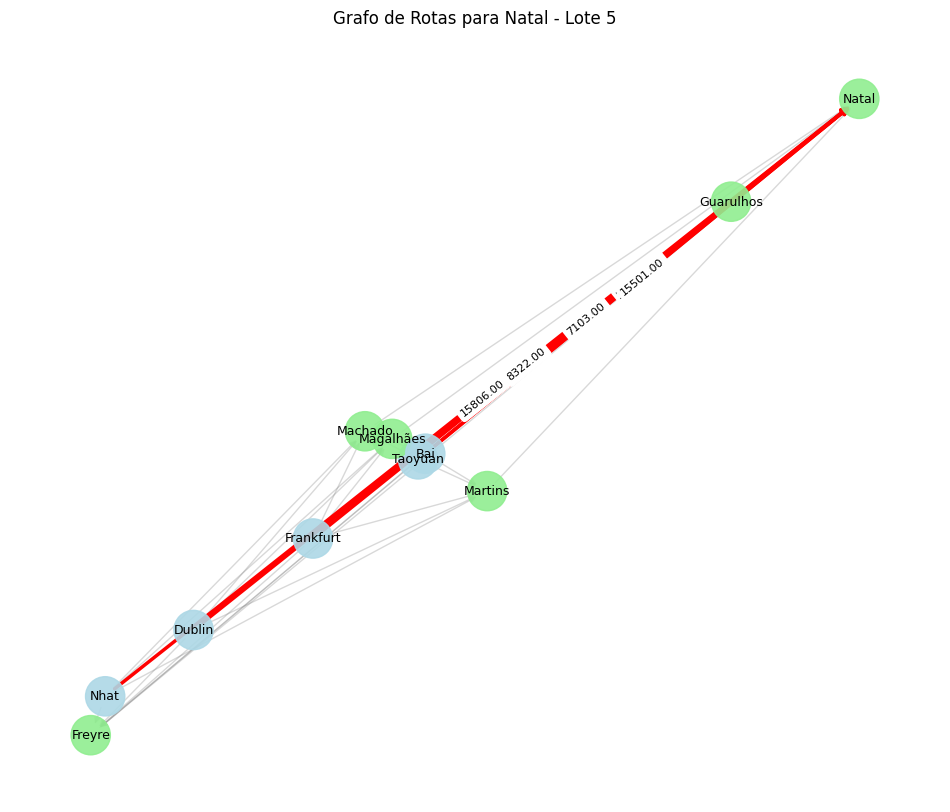

Processando aeroportos: ['Aeroporto de Varsóvia Chopin', 'Aeroporto de Oslo-Gardermoen', 'Aeroporto de Roma-Fiumicino', 'Aeroporto de Milão-Malpensa', 'Aeroporto de Praga']


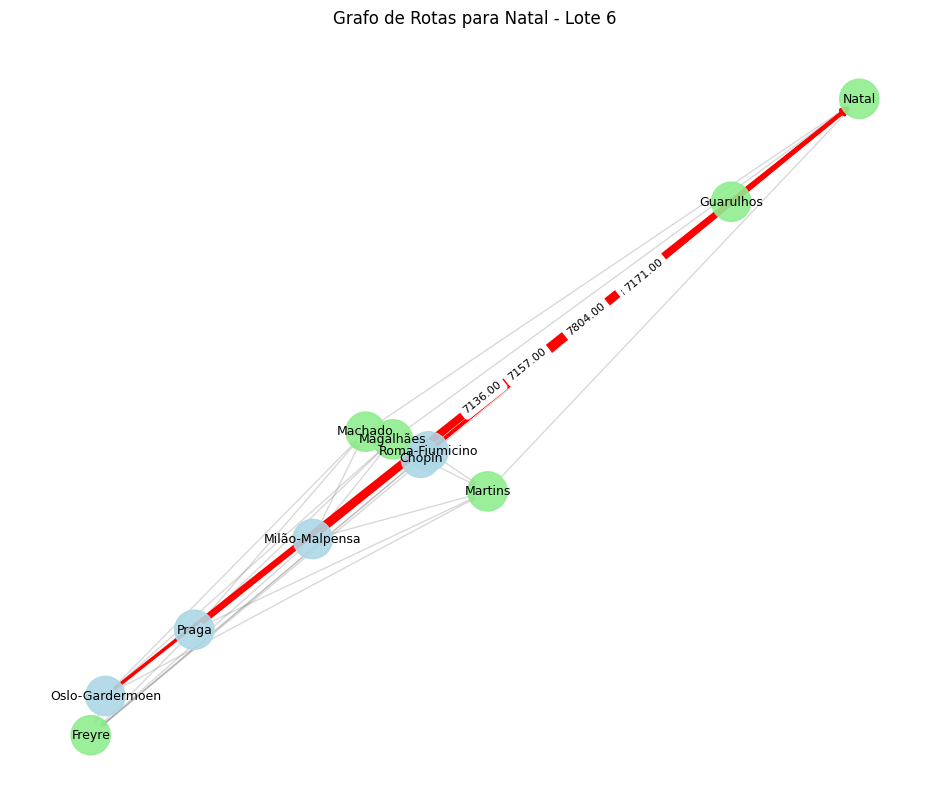

Processando aeroportos: ['Aeroporto de Heathrow (Londres)', 'Aeroporto de Gatwick (Londres)', 'Aeroporto Internacional de Budapeste Ferenc Liszt', 'Aeroporto de Schiphol (Amsterdã)', 'Aeroporto Internacional de Boryspil (Kiev)']


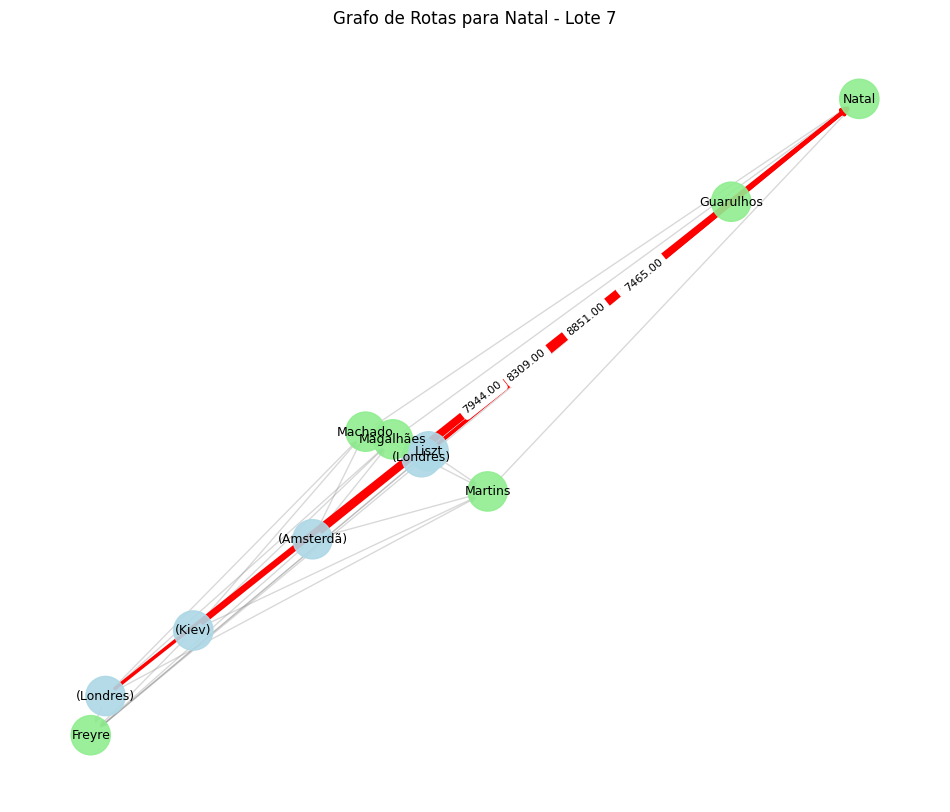

Processando aeroportos: ['Aeroporto de Istambul', 'Aeroporto de Zurique', 'Aeroporto de Estocolmo-Arlanda', 'Aeroporto Nikola Tesla (Belgrado)', 'Aeroporto Internacional Sheremetyevo (Moscou)']


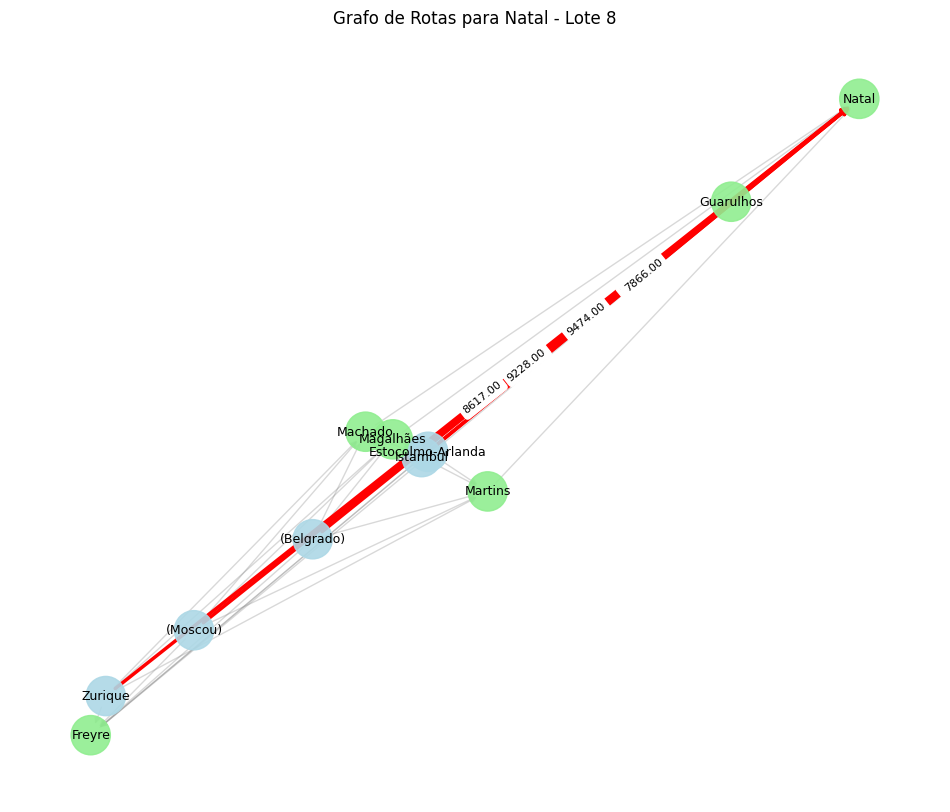

Processando aeroportos: ['Aeroporto de Pulkovo (São Petersburgo)', 'Aeroporto Internacional Henri Coandă (Bucareste)', 'Aeroporto Humberto Delgado (Lisboa)', 'Aeroporto Francisco Sá Carneiro (Porto)', 'Aeroporto Internacional de Malta']


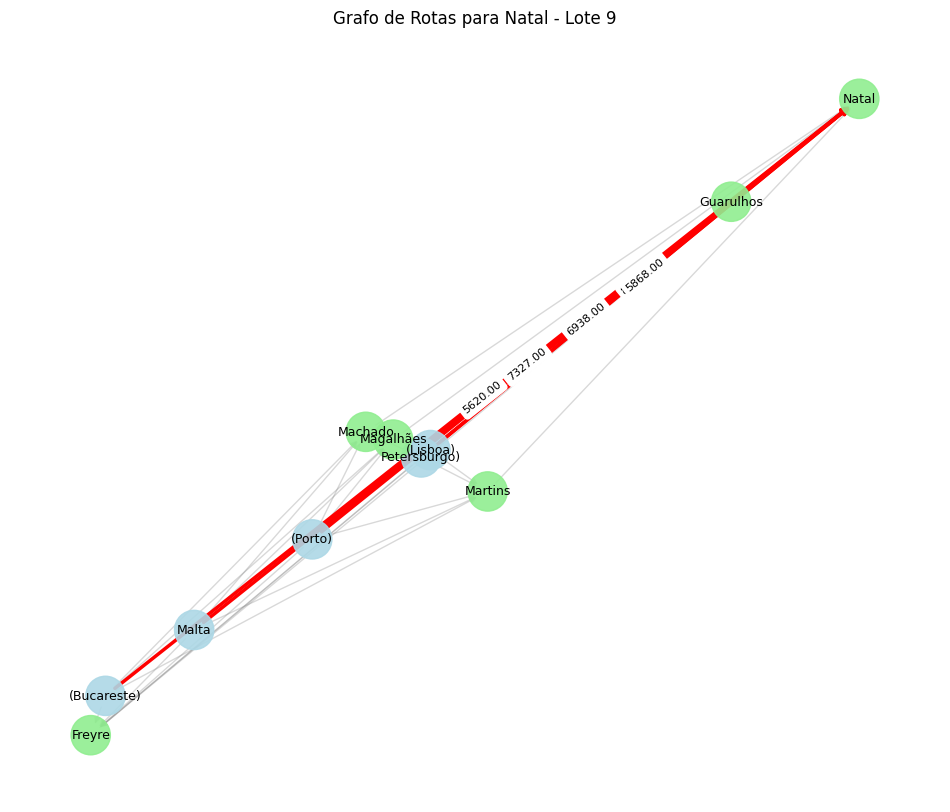

Processando aeroportos: ['Aeroporto de Luxemburgo', 'Aeroporto Internacional de Vilnius', 'Aeroporto Internacional de Riga', 'Aeroporto Internacional Madre Teresa (Tirana)', 'Aeroporto de Barcelona-El Prat (Espanha)']


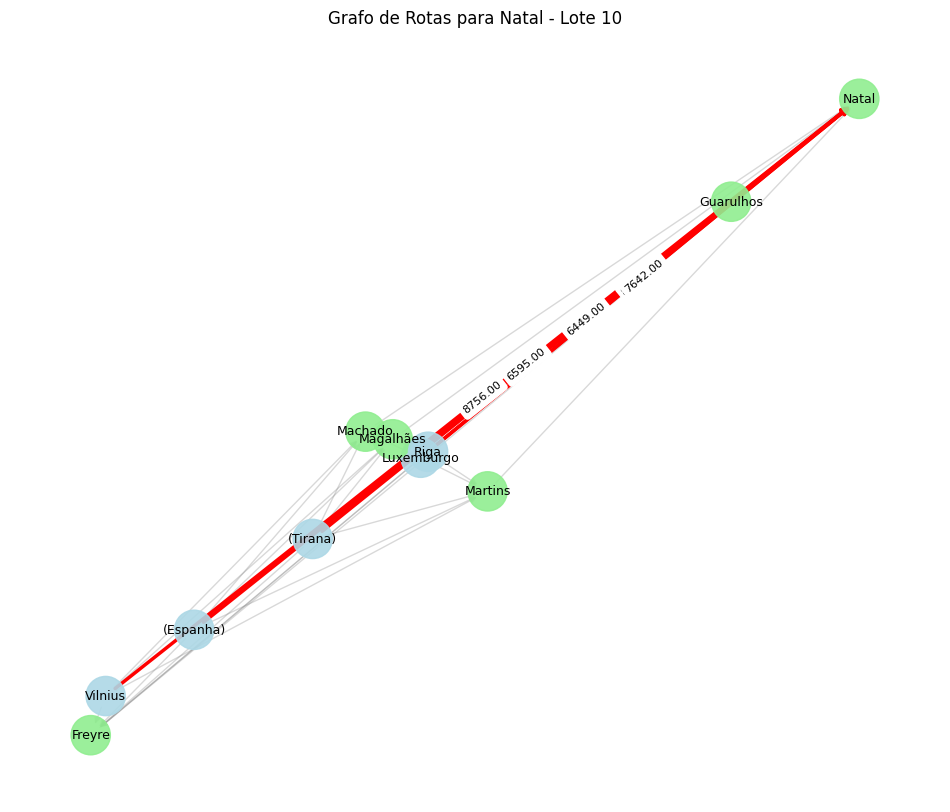

Processando aeroportos: ['Aeroporto de Toulouse-Blagnac (França)', 'Aeroporto Internacional de Viena', 'Aeroporto de Bruxelas', 'Aeroporto de Sófia', 'Aeroporto de Bratislava']


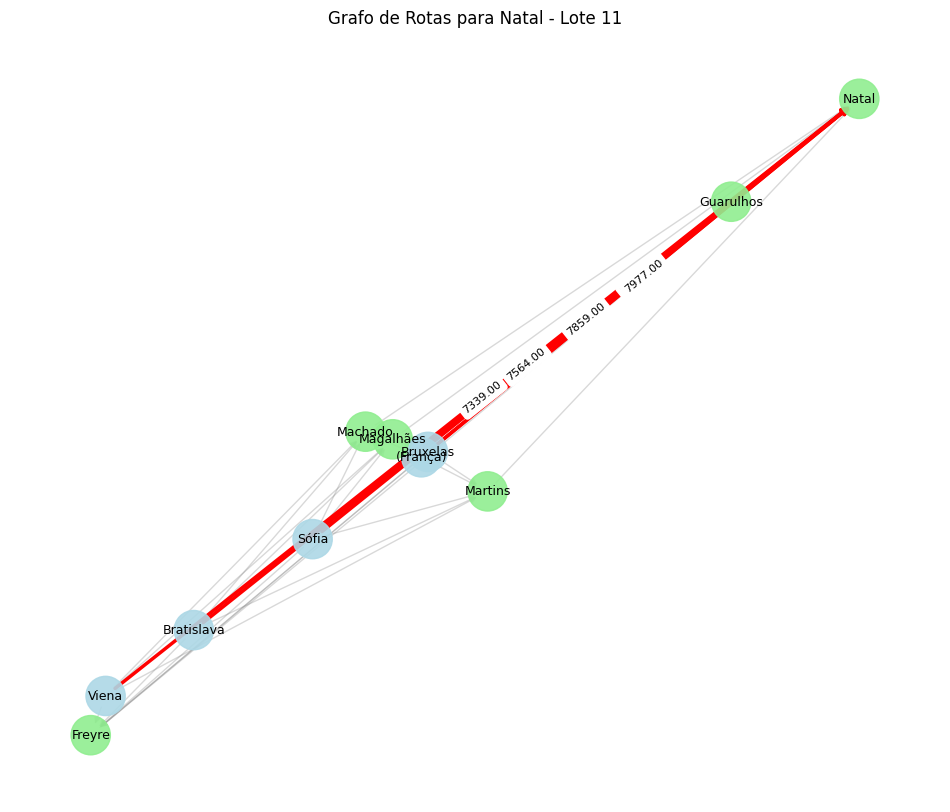

Processando aeroportos: ['Aeroporto de Ljubljana Jože Pučnik', 'Aeroporto Adolfo Suárez Madrid-Barajas', 'Aeroporto de Barcelona-El Prat', 'Aeroporto de Tallinn', 'Aeroporto de Vágar']


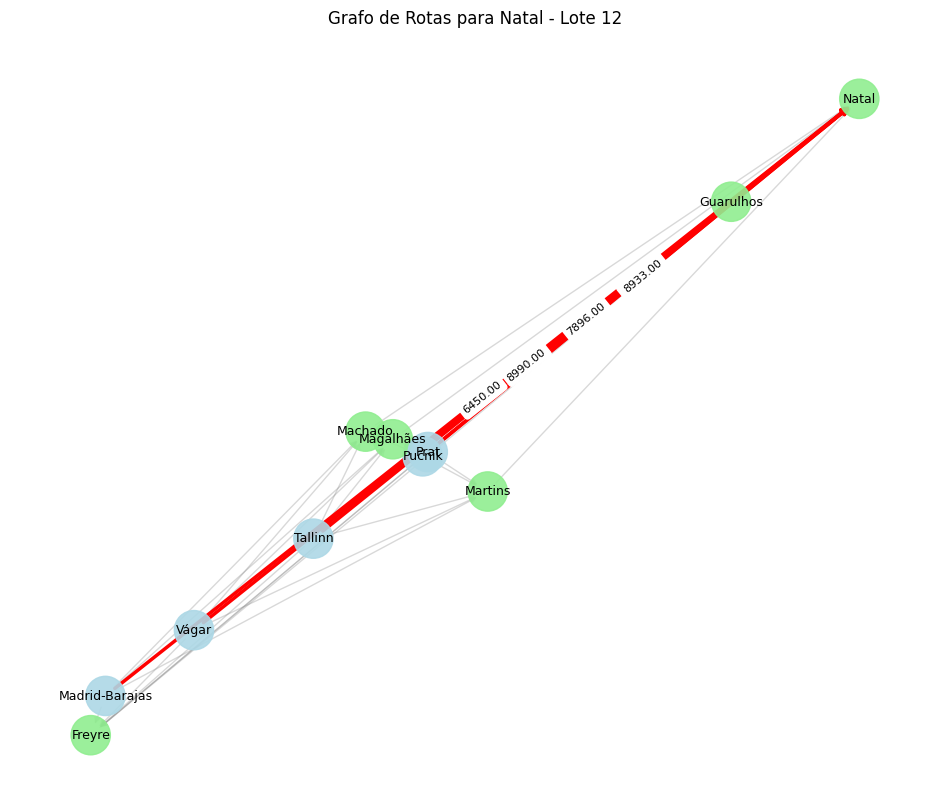

In [64]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Função para carregar um grafo a partir de um DataFrame
def load_graph_from_df(df, source_airports, interest_airports, natal_airport):
    # Dicionário contendo a distância de aeroportos específicos até Natal
    distancia_natal = {
        "Aeroporto Internacional de Guarulhos": dist_sp,
        "Aeroporto Internacional Guararapes - Gilberto Freyre": dist_pe,
        "Aeroporto Internacional Deputado Luís Eduardo Magalhães": dist_ba,
        "Aeroporto Internacional Marechal Cunha Machado": dist_ma,
        "Aeroporto Internacional Pinto Martins": dist_ce,
    }

    # Filtrar o DataFrame para incluir apenas as rotas relevantes
    filtered_df = df[
        (df['InputID'].isin(source_airports)) &  # Apenas rotas com origem no lote atual
        (df['TargetID'].isin(interest_airports))  # Apenas rotas com destino em aeroportos de interesse
    ]

    # Criar um grafo direcionado
    G = nx.DiGraph()

    # Adicionar arestas com pesos ao grafo
    for _, row in filtered_df.iterrows():
        source = row['InputID']
        target = row['TargetID']
        distance = row['Distância km']

        # Inicializar o peso como a distância da rota
        weight = distance

        # Adicionar penalidade se o destino não for Natal
        if target != natal_airport:
            weight += distancia_natal.get(source, 0)  # Penalidade baseada no dicionário de distâncias

        # Adicionar a aresta ao grafo
        G.add_edge(source, target, weight=weight, distance=distance)

    # Garantir a existência de arestas diretas entre aeroportos nacionais e Natal
    for airport in distancia_natal:
        if not G.has_edge(airport, natal_airport):  # Adicionar apenas se a aresta ainda não existir
            distance = distancia_natal[airport]
            weight = distance  # Peso é igual à distância direta
            G.add_edge(airport, natal_airport, weight=weight, distance=distance)

    return G

# Função para destacar as rotas ideais
def highlight_routes(G, source_airports, natal_airport):
    # Conjunto para armazenar as arestas dos caminhos ideais
    ideal_path_edges = set()

    for source in source_airports:
        try:
            # Encontrar o caminho de menor peso de cada aeroporto de origem até Natal
            path = nx.shortest_path(G, source=source, target=natal_airport, weight='weight')
            # Adicionar todas as arestas do caminho ideal ao conjunto
            for i in range(len(path) - 1):
                edge = (path[i], path[i + 1])
                ideal_path_edges.add(edge)
        except nx.NetworkXNoPath:
            continue  # Ignorar aeroportos sem caminhos válidos para Natal

    return list(ideal_path_edges)  # Retornar como lista

# Função para plotar o grafo destacando as rotas ideais
def plot_clean_graph(G, ideal_path_edges, interest_airports, title_suffix):
    # Gerar a disposição dos nós no gráfico
    pos = nx.spring_layout(G, k=0.5, seed=42)

    plt.figure(figsize=(12, 10))

    # Definir cores para os nós
    node_colors = [
        'lightgreen' if node in interest_airports else 'lightblue' for node in G.nodes
    ]

    # Mapear rótulos para exibir apenas a cidade (última parte do nome do aeroporto)
    node_labels = {
        node: node.split(' ')[-1] if node != 'Aeroporto Internacional Governador Aluízio Alves' else 'Natal'
        for node in G.nodes
    }

    # Desenhar os nós
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, alpha=0.9)

    # Desenhar as arestas regulares em cinza
    regular_edges = [edge for edge in G.edges if edge not in ideal_path_edges]
    nx.draw_networkx_edges(G, pos, edgelist=regular_edges, edge_color='gray', alpha=0.3, width=1)

    # Destacar as arestas ideais em vermelho
    nx.draw_networkx_edges(G, pos, edgelist=ideal_path_edges, edge_color='red', width=2.5)

    # Adicionar rótulos aos nós
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=9, font_color='black')

    # Adicionar rótulos às arestas destacadas (exibindo o peso)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    highlighted_labels = {edge: f"{weight:.2f}" for edge, weight in edge_labels.items() if edge in ideal_path_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=highlighted_labels, font_size=8)

    # Configurar título e exibição do gráfico
    plt.title(f'Grafo de Rotas para Natal - {title_suffix}')
    plt.axis('off')
    plt.show()

# Definir o aeroporto de destino final
natal = 'Aeroporto Internacional Governador Aluízio Alves'

# Processar aeroportos em lotes de 5
batch_size = 5
for i in range(0, len(lista_origem), batch_size):
    # Dividir os aeroportos de origem em lotes
    subset_origem = lista_origem[i:i + batch_size]
    print(f"Processando aeroportos: {subset_origem}")

    # Criar o grafo apenas com dados do lote atual
    G = load_graph_from_df(df, subset_origem, aeroportos_interesse, natal)

    # Calcular as rotas ideais para Natal
    ideal_path_edges = highlight_routes(G, subset_origem, natal)

    # Plotar o grafo destacando as rotas ideais
    plot_clean_graph(G, ideal_path_edges, aeroportos_interesse, title_suffix=f"Lote {i // batch_size + 1}")


Processando aeroportos: ['Aeroporto Internacional de Nursultan Nazarbayev', 'Aeroporto Internacional de Xangai Pudong', 'Aeroporto Internacional de Pequim Capital', 'Aeroporto Internacional de Pyongyang Sunan', 'Aeroporto Internacional de Incheon', 'Aeroporto Internacional Ninoy Aquino', 'Aeroporto Internacional de Hong Kong']


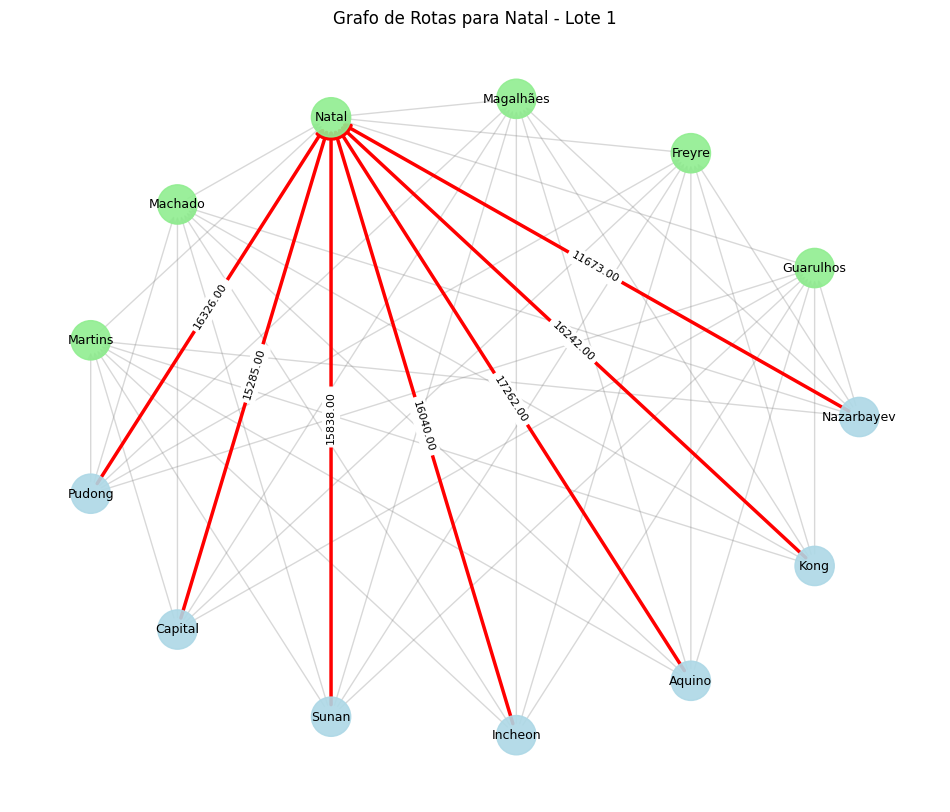

Processando aeroportos: ['Aeroporto Internacional Indira Gandhi', 'Aeroporto Internacional Soekarno-Hatta (Jacarta)', 'Aeroporto Internacional Ngurah Rai (Bali)', 'Aeroporto Internacional de Narita (Tóquio)', 'Aeroporto Internacional de Haneda (Tóquio)', 'Aeroporto Internacional de Kansai (Osaka)', 'Aeroporto Internacional de Wattay (Vientiane)']


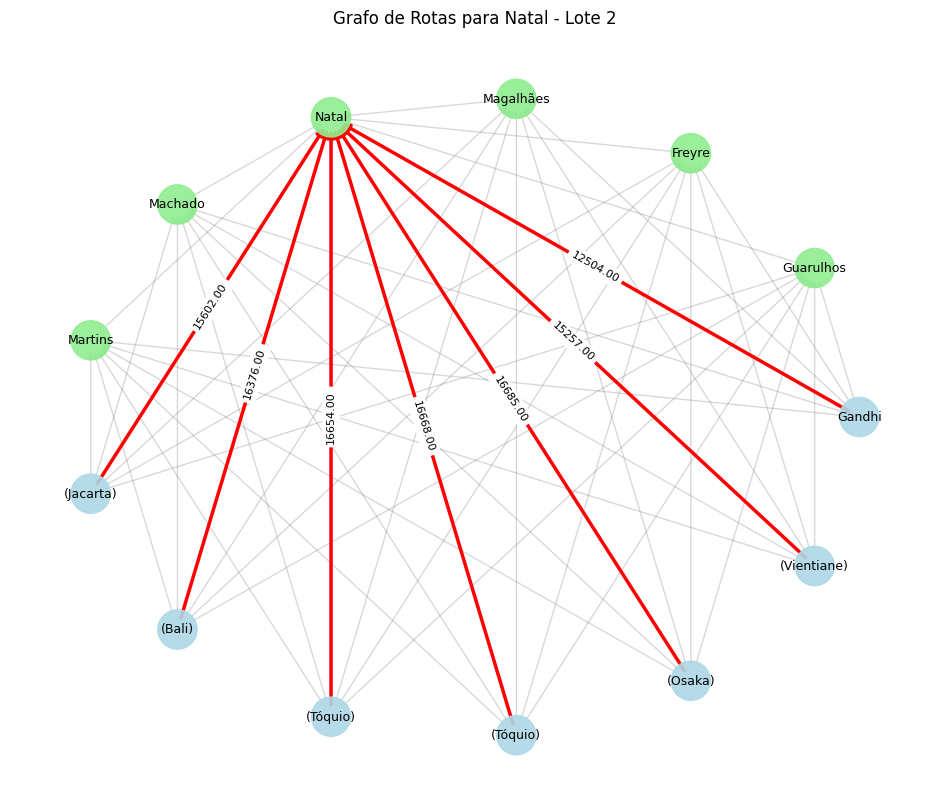

Processando aeroportos: ['Aeroporto Internacional de Kuala Lumpur (Sepang)', 'Aeroporto Internacional de Penang (Penang)', 'Aeroporto Internacional de Malé', 'Aeroporto Internacional de Changi', 'Aeroporto Internacional de Suvarnabhumi', 'Aeroporto Internacional Don Mueang', 'Aeroporto Internacional de Taiwan Taoyuan']


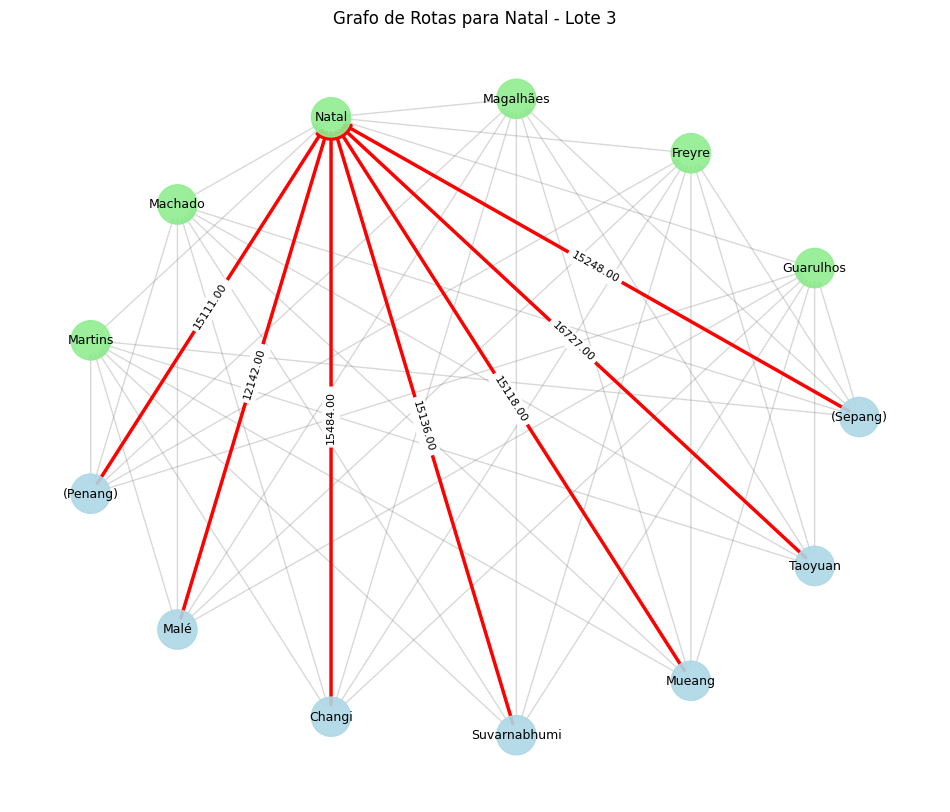

Processando aeroportos: ['Aeroporto Internacional de Tan Son Nhat', 'Aeroporto Internacional de Noi Bai', 'Aeroporto de Frankfurt', 'Aeroporto de Dublin', 'Aeroporto de Varsóvia Chopin', 'Aeroporto de Oslo-Gardermoen', 'Aeroporto de Roma-Fiumicino']


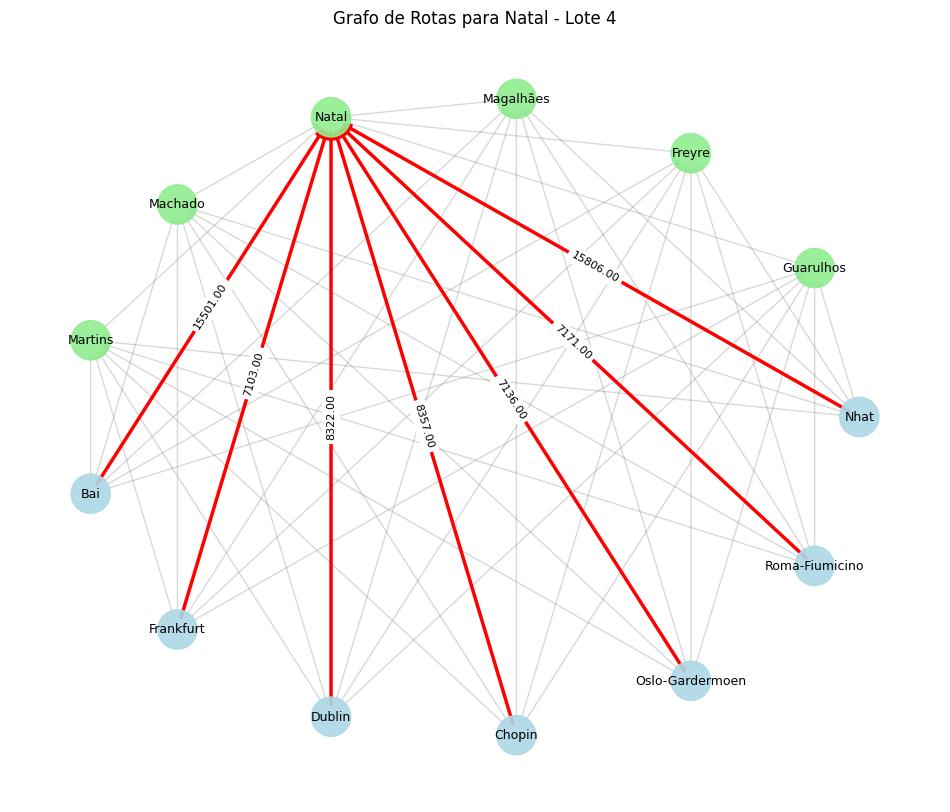

Processando aeroportos: ['Aeroporto de Milão-Malpensa', 'Aeroporto de Praga', 'Aeroporto de Heathrow (Londres)', 'Aeroporto de Gatwick (Londres)', 'Aeroporto Internacional de Budapeste Ferenc Liszt', 'Aeroporto de Schiphol (Amsterdã)', 'Aeroporto Internacional de Boryspil (Kiev)']


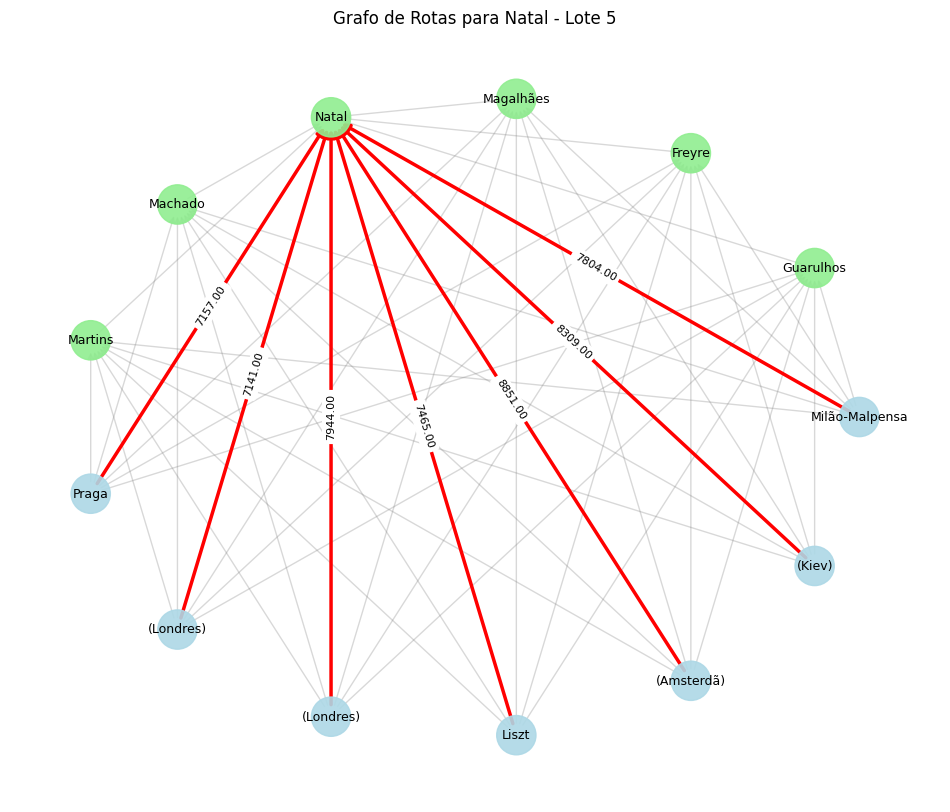

Processando aeroportos: ['Aeroporto de Istambul', 'Aeroporto de Zurique', 'Aeroporto de Estocolmo-Arlanda', 'Aeroporto Nikola Tesla (Belgrado)', 'Aeroporto Internacional Sheremetyevo (Moscou)', 'Aeroporto de Pulkovo (São Petersburgo)', 'Aeroporto Internacional Henri Coandă (Bucareste)']


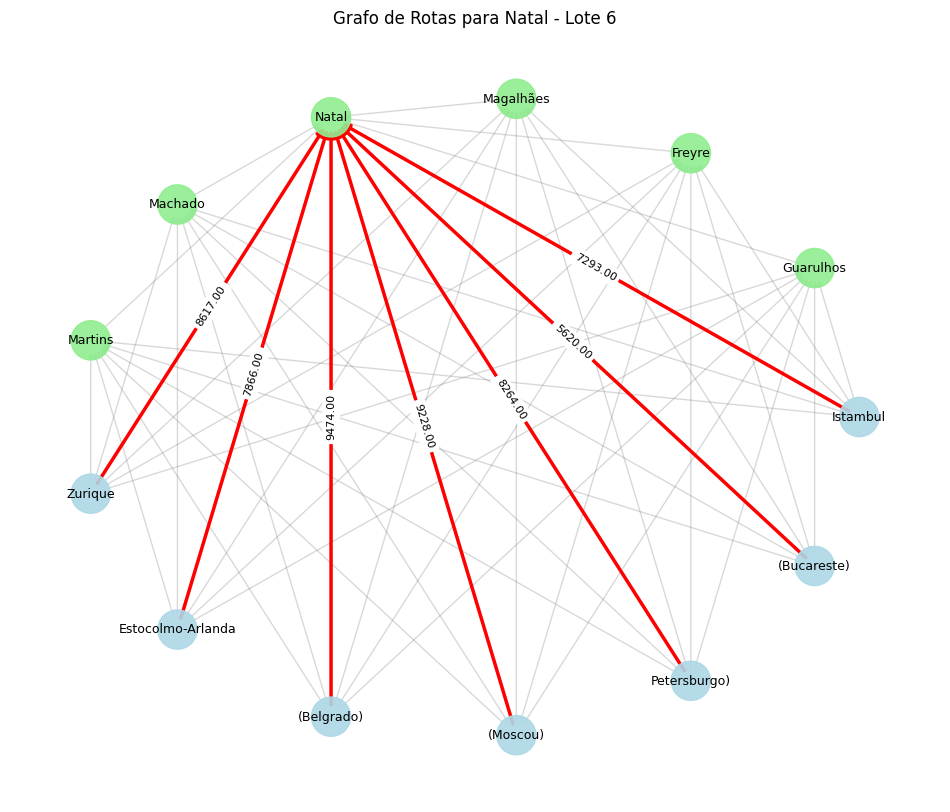

Processando aeroportos: ['Aeroporto Humberto Delgado (Lisboa)', 'Aeroporto Francisco Sá Carneiro (Porto)', 'Aeroporto Internacional de Malta', 'Aeroporto de Luxemburgo', 'Aeroporto Internacional de Vilnius', 'Aeroporto Internacional de Riga', 'Aeroporto Internacional Madre Teresa (Tirana)']


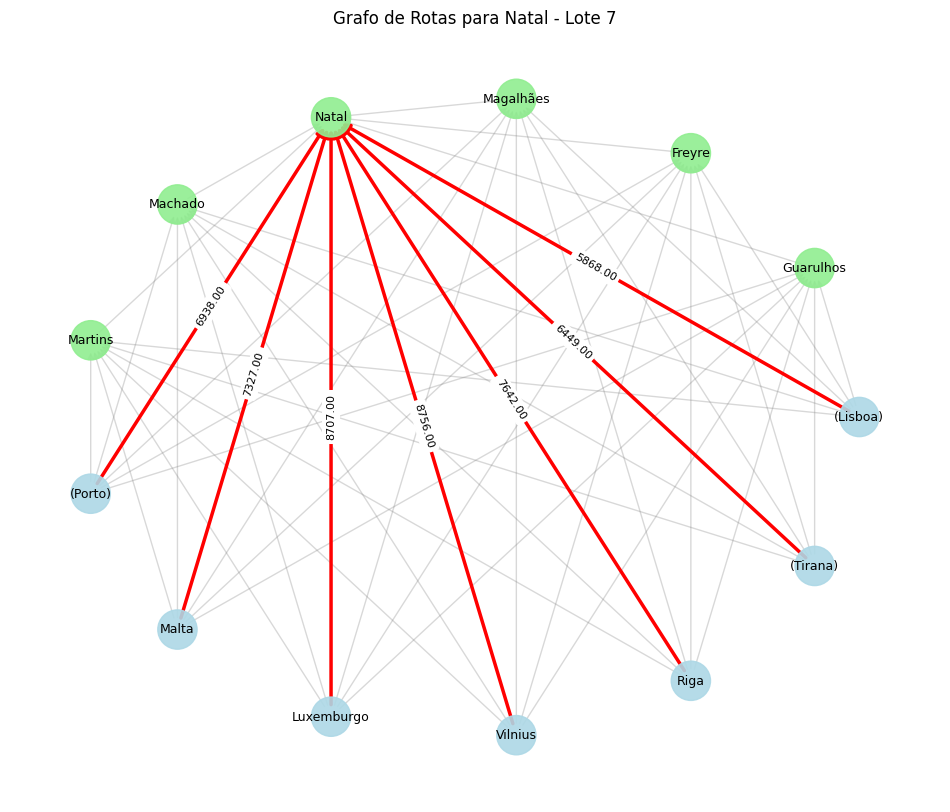

Processando aeroportos: ['Aeroporto de Barcelona-El Prat (Espanha)', 'Aeroporto de Toulouse-Blagnac (França)', 'Aeroporto Internacional de Viena', 'Aeroporto de Bruxelas', 'Aeroporto de Sófia', 'Aeroporto de Bratislava', 'Aeroporto de Ljubljana Jože Pučnik']


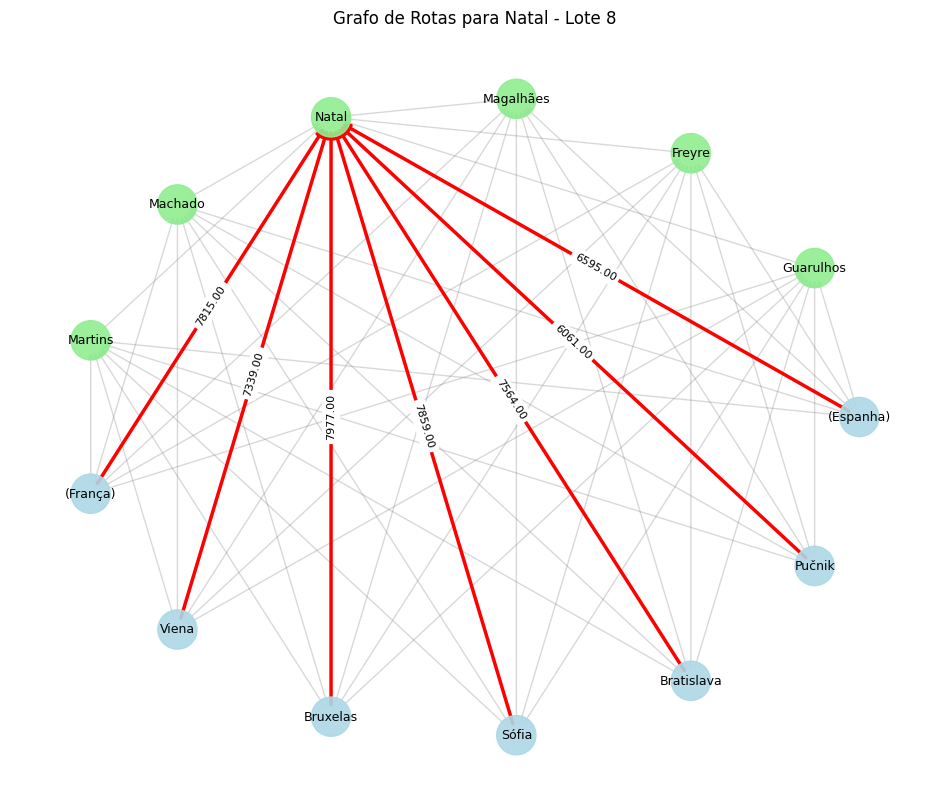

Processando aeroportos: ['Aeroporto Adolfo Suárez Madrid-Barajas', 'Aeroporto de Barcelona-El Prat', 'Aeroporto de Tallinn', 'Aeroporto de Vágar']


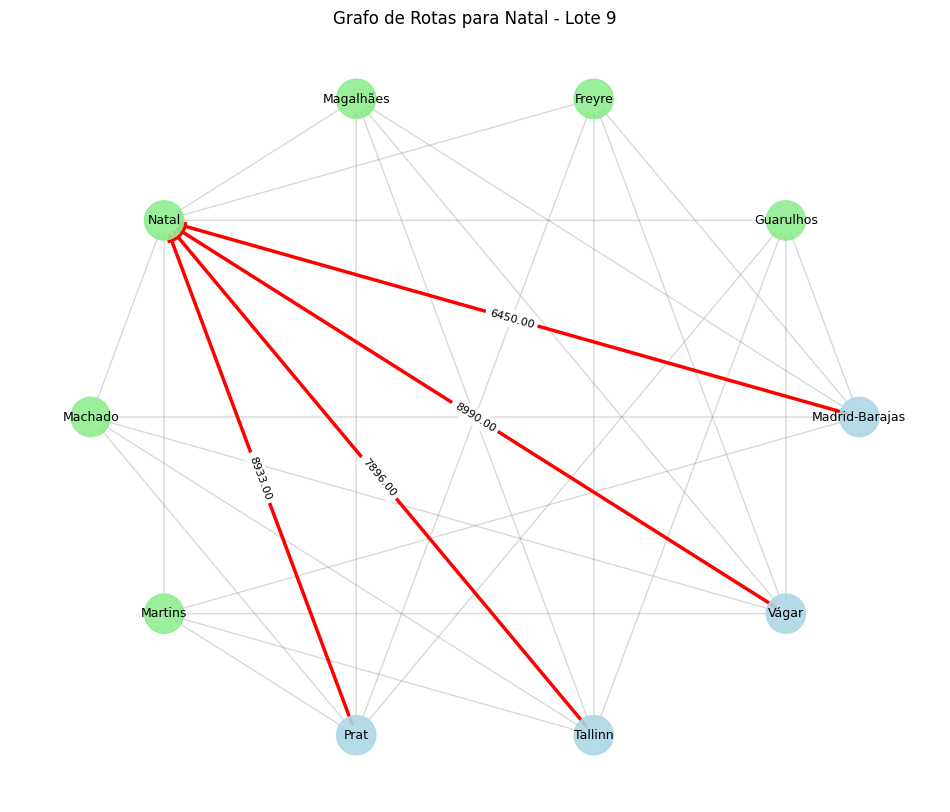

In [61]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def load_graph_from_df(df, source_airports, interest_airports, natal_airport):
    distancia_natal = {
        "Aeroporto Internacional de Guarulhos": dist_sp,
        "Aeroporto Internacional Guararapes - Gilberto Freyre": dist_pe,
        "Aeroporto Internacional Deputado Luís Eduardo Magalhães": dist_ba,
        "Aeroporto Internacional Marechal Cunha Machado": dist_ma,
        "Aeroporto Internacional Pinto Martins": dist_ce,
    }

    # Filtrar o DataFrame para incluir apenas os aeroportos do lote atual e de interesse
    filtered_df = df[
        (df['InputID'].isin(source_airports)) & 
        (df['TargetID'].isin(interest_airports))
    ]

    # Criar grafo direcionado
    G = nx.DiGraph()

    # Adicionar arestas com pesos ao grafo
    for _, linha in filtered_df.iterrows():
        source = linha['InputID']
        target = linha['TargetID']
        # Peso baseado apenas na distância
        weight = linha['Distância km']

        # Adicionar penalidade específica se o destino não for Natal
        if target != natal_airport:
            weight += distancia_natal.get(source, 0)  # Soma a distância específica

        G.add_edge(source, target, weight=weight)

    # Adicionar arestas diretas de todos os aeroportos nacionais para Natal, caso ainda não existam
    for airport in distancia_natal:
        if not G.has_edge(airport, natal_airport):

            weight = distancia_natal[airport]
            G.add_edge(airport, natal_airport, weight=weight)

    return G

def highlight_routes(G, source_airports, natal_airport):
    ideal_path_edges = set()

    for source in source_airports:
        try:
            # Encontrar o caminho de menor peso
            path = nx.shortest_path(G, source=source, target=natal_airport, weight='weight')
            for i in range(len(path) - 1):
                edge = (path[i], path[i + 1])
                ideal_path_edges.add(edge)
        except nx.NetworkXNoPath:
            continue  # Ignorar se não houver caminho

    return list(ideal_path_edges)

def plot_clean_graph(G, ideal_path_edges, interest_airports, title_suffix):
    pos = nx.circular_layout(G)  # Layout ajustado

    plt.figure(figsize=(12, 10))

    # Definir cores dos nós
    node_colors = [
        'lightgreen' if node in interest_airports else 'lightblue' for node in G.nodes
    ]

    # Mapear os rótulos para exibir apenas a cidade
    node_labels = {
        node: node.split(' ')[-1] if node != 'Aeroporto Internacional Governador Aluízio Alves' else 'Natal'
        for node in G.nodes
    }

    # Desenhar nós
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, alpha=0.9)

    # Arestas regulares
    regular_edges = [edge for edge in G.edges if edge not in ideal_path_edges]
    nx.draw_networkx_edges(G, pos, edgelist=regular_edges, edge_color='gray', alpha=0.3, width=1)

    # Arestas ideais em vermelho
    nx.draw_networkx_edges(G, pos, edgelist=ideal_path_edges, edge_color='red', width=2.5)

    # Rótulos dos nós
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=9, font_color='black')

    # Rótulos para as arestas ideais
    edge_labels = nx.get_edge_attributes(G, 'weight')
    highlighted_labels = {edge: f"{weight:.2f}" for edge, weight in edge_labels.items() if edge in ideal_path_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=highlighted_labels, font_size=8)

    plt.title(f'Grafo de Rotas para Natal - {title_suffix}')
    plt.axis('off')
    plt.show()

natal = 'Aeroporto Internacional Governador Aluízio Alves'

# Processar os aeroportos em grupos de 5
batch_size = 7
for i in range(0, len(lista_origem), batch_size):
    subset_origem = lista_origem[i:i + batch_size]
    print(f"Processando aeroportos: {subset_origem}")

    # Carregar o grafo apenas com dados do lote atual
    G = load_graph_from_df(df, subset_origem, aeroportos_interesse, natal)

    # Calcular rotas ideais para Natal
    ideal_path_edges = highlight_routes(G, subset_origem, natal)

    # Plotar o grafo com as rotas ideais destacadas
    plot_clean_graph(G, ideal_path_edges, aeroportos_interesse, title_suffix=f"Lote {i // batch_size + 1}")
